In [ ]:
!pip3 install nltk
!pip install matplotlib
!pip install seaborn
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('corpus')
!pip install TextBlob
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
!pip install spacytextblob
import spacy.cli
spacy.cli.download("en_core_web_sm")
import en_core_web_sm
!pip install spacytextblob



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/morganstanley/ML-for-Good-Hackathon/main/Data/CrisisLogger/crisislogger.csv"
df = pd.read_csv(url)
df

,upload_id,transcriptions
0,10,so high our experience so far has been a littl...
1,209,I'm not going to stay in my name for the anony...
2,216,so far I have been florentines now for about a...
3,222,it has actually been a very difficult. Trying ...
4,228,so this whole situation has been strange for u...
...,...,...
135,750,I am a parent of a 5th grader going into 6th g...
136,752,over 19 really impacted us because and it's no...
137,754,so today is May 20th and has been over for abo...
138,756,hi my name is divyansh not trying and I live i...


Check If there are any multiple transcripts per upload_id

In [ ]:
t = df.groupby(['upload_id']).count()
t[t>1]

,transcriptions
upload_id,
10,NaN
209,NaN
216,NaN
222,NaN
228,NaN
...,...
750,NaN
752,NaN
754,NaN


In [ ]:
# Cleaning the text in the review column
df['transcriptions'] = df['transcriptions'].replace('[^A-Za-z]+')
df.head()

,upload_id,transcriptions
0,10,so high our experience so far has been a littl...
1,209,I'm not going to stay in my name for the anony...
2,216,so far I have been florentines now for about a...
3,222,it has actually been a very difficult. Trying ...
4,228,so this whole situation has been strange for u...


Sentiment Analysis using TextBlob

In [ ]:
from nltk import word_tokenize
text = "This is good"
tokens = word_tokenize(text)
tokens 

['This', 'is', 'good']

In [ ]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['transcriptions'].apply(token_stop_pos)
df.head()

,upload_id,transcriptions,POS tagged
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little..."
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a..."
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half..."
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr..."
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,upload_id,transcriptions,POS tagged,Lemma
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...


In [ ]:
df

,upload_id,transcriptions,POS tagged,Lemma
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...
...,...,...,...,...
135,750,I am a parent of a 5th grader going into 6th g...,"[(parent, n), (5th, a), (grader, n), (going, v...",parent 5th grader go 6th grade son autism 75...
136,752,over 19 really impacted us because and it's no...,"[(19, None), (really, r), (impacted, a), (us, ...",19 really impacted us 's shutdown school out...
137,754,so today is May 20th and has been over for abo...,"[(today, n), (May, n), (20th, None), (two, Non...",today May 20th two month two make knock two ...
138,756,hi my name is divyansh not trying and I live i...,"[(hi, n), (name, n), (divyansh, a), (trying, v...",hi name divyansh try live New York City want...


In [ ]:
# function to analyze the sentiment/polarity
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

In [ ]:
from textblob import TextBlob
test=TextBlob("This is good test data").sentiment
testpolar = analysis(test.polarity)
testpolar

'Positive'

In [ ]:
from textblob import TextBlob
test=TextBlob("This is bad test data").sentiment
testpolar = analysis(test.polarity)
testpolar

'Negative'

In [ ]:
from textblob import TextBlob
test=TextBlob("This is not bad test data").sentiment
testpolar = analysis(test.polarity)
testpolar

'Positive'

In [ ]:
df = pd.DataFrame(df)
df['Polarity'] = df['Lemma'].apply(getPolarity) 
df['AnalysisTextBlob'] = df['Polarity'].apply(analysis)
df

,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive
...,...,...,...,...,...,...
135,750,I am a parent of a 5th grader going into 6th g...,"[(parent, n), (5th, a), (grader, n), (going, v...",parent 5th grader go 6th grade son autism 75...,0.152721,Positive
136,752,over 19 really impacted us because and it's no...,"[(19, None), (really, r), (impacted, a), (us, ...",19 really impacted us 's shutdown school out...,0.055411,Positive
137,754,so today is May 20th and has been over for abo...,"[(today, n), (May, n), (20th, None), (two, Non...",today May 20th two month two make knock two ...,0.092363,Positive
138,756,hi my name is divyansh not trying and I live i...,"[(hi, n), (name, n), (divyansh, a), (trying, v...",hi name divyansh try live New York City want...,0.179040,Positive


In [ ]:
tb_counts = df.AnalysisTextBlob.value_counts()

tb_counts

Positive    108
Negative     26
Neutral       6
Name: AnalysisTextBlob, dtype: int64

Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner. Vader sentiment tells if the statement is positive or negative along with the intensity of emotion.

The sum of pos, neg, neu intensities give 1. Compound ranges from -1 to 1 and is the metric used to draw the overall sentiment.
positive if compound >= 0.5
neutral if -0.5 < compound < 0.5
negative if -0.5 >= compound

In [ ]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
    
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
analyzer = SentimentIntensityAnalyzer()
vztest = analyzer.polarity_scores("I hate horror")
vztest


{'compound': -0.8126, 'neg': 0.881, 'neu': 0.119, 'pos': 0.0}

In [ ]:
c = vadersentimentanalysis("I hate horror")
print(vader_analysis(c))

Negative


In [ ]:
analyzer = SentimentIntensityAnalyzer()
df['VaderSentiment'] = df['Lemma'].apply(vadersentimentanalysis)
df['VaderAnalysis'] = df['VaderSentiment'].apply(vader_analysis)
df.head()


,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob,VaderSentiment,VaderAnalysis
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative,0.9643,Positive
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive,0.6720,Positive
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive,0.9631,Positive
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive,-0.5423,Negative
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive,-0.2075,Neutral


In [ ]:
vader_counts = df['VaderAnalysis'].value_counts()
vader_counts

Positive    79
Neutral     34
Negative    27
Name: VaderAnalysis, dtype: int64

Sentiment Analysis using SentiWordNet

SentiWordNet uses the WordNet database. It is important to obtain the POS, lemma of each word. We will then use the lemma, POS to obtain the synonym sets(synsets). We then obtain the positive, negative, objective scores for all the possible synsets or the very first synset and label the text.

if positive score > negative score, the sentiment is positive
if positive score < negative score, the sentiment is negative
if positive score = negative score, the sentiment is neutral

In [ ]:
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    lemma = 0
    for word, pos in pos_data:
        #print(word +" "+ pos)
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        #print(lemma)
        if not lemma:
          continue
        synsets = wordnet.synsets(lemma, pos=pos)
        #print(synsets)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        #print(synset)
        swn_synset = swn.senti_synset(synset.name())
        #print(swn_synset)
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            #print('test')
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"

In [ ]:
df['SWNAnalysis'] = df['POS tagged'].apply(sentiwordnetanalysis)
df.head()

,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob,VaderSentiment,VaderAnalysis,SWNAnalysis
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative,0.9643,Positive,Negative
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive,0.6720,Positive,Neutral
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive,0.9631,Positive,Neutral
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive,-0.5423,Negative,Positive
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive,-0.2075,Neutral,Positive


In [ ]:
swn_counts= df['SWNAnalysis'].value_counts()
swn_counts

Neutral     88
Negative    29
Positive    23
Name: SWNAnalysis, dtype: int64

In [ ]:
from spacytextblob.spacytextblob import SpacyTextBlob
import spacy
text = "I had good day"
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
nlp.add_pipe("spacytextblob")
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'spacytextblob']

In [ ]:
df

,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob,VaderSentiment,VaderAnalysis,SWNAnalysis
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative,0.9643,Positive,Negative
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive,0.6720,Positive,Neutral
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive,0.9631,Positive,Neutral
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive,-0.5423,Negative,Positive
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive,-0.2075,Neutral,Positive
...,...,...,...,...,...,...,...,...,...
135,750,I am a parent of a 5th grader going into 6th g...,"[(parent, n), (5th, a), (grader, n), (going, v...",parent 5th grader go 6th grade son autism 75...,0.152721,Positive,-0.3892,Neutral,Neutral
136,752,over 19 really impacted us because and it's no...,"[(19, None), (really, r), (impacted, a), (us, ...",19 really impacted us 's shutdown school out...,0.055411,Positive,0.4767,Neutral,Positive
137,754,so today is May 20th and has been over for abo...,"[(today, n), (May, n), (20th, None), (two, Non...",today May 20th two month two make knock two ...,0.092363,Positive,0.9741,Positive,Positive
138,756,hi my name is divyansh not trying and I live i...,"[(hi, n), (name, n), (divyansh, a), (trying, v...",hi name divyansh try live New York City want...,0.179040,Positive,0.9858,Positive,Neutral


In [ ]:
doc = nlp(text)
print(doc._.polarity)
print(doc._.subjectivity) 
print(doc._.assessments)
df['AnalysiSpacyTextBlob'] = 'test'

  
 
 

0.7
0.6000000000000001
[(['good'], 0.7, 0.6000000000000001, None)]


In [ ]:
for transcriptions,i in zip(df.transcriptions,df.index):
  doc = nlp(transcriptions)
  df['AnalysiSpacyTextBlob'][i]=analysis(doc._.polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,upload_id,transcriptions,POS tagged,Lemma,Polarity,AnalysisTextBlob,VaderSentiment,VaderAnalysis,SWNAnalysis,AnalysiSpacyTextBlob
0,10,so high our experience so far has been a littl...,"[(high, a), (experience, n), (far, r), (little...",high experience far little bit difficult tee...,-0.003229,Negative,0.9643,Positive,Negative,Positive
1,209,I'm not going to stay in my name for the anony...,"[('m, v), (going, v), (stay, v), (name, n), (a...",'m go stay name anonymity mid-forties remote...,0.062419,Positive,0.6720,Positive,Neutral,Negative
2,216,so far I have been florentines now for about a...,"[(far, r), (florentines, n), (month-and-a-half...",far florentine month-and-a-half 's tough see...,0.002892,Positive,0.9631,Positive,Neutral,Positive
3,222,it has actually been a very difficult. Trying ...,"[(actually, r), (difficult, a), (., None), (Tr...",actually difficult . Trying get adjust chang...,0.192857,Positive,-0.5423,Negative,Positive,Positive
4,228,so this whole situation has been strange for u...,"[(whole, a), (situation, n), (strange, a), (us...",whole situation strange us feel lucky 've la...,0.011815,Positive,-0.2075,Neutral,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...
135,750,I am a parent of a 5th grader going into 6th g...,"[(parent, n), (5th, a), (grader, n), (going, v...",parent 5th grader go 6th grade son autism 75...,0.152721,Positive,-0.3892,Neutral,Neutral,Positive
136,752,over 19 really impacted us because and it's no...,"[(19, None), (really, r), (impacted, a), (us, ...",19 really impacted us 's shutdown school out...,0.055411,Positive,0.4767,Neutral,Positive,Negative
137,754,so today is May 20th and has been over for abo...,"[(today, n), (May, n), (20th, None), (two, Non...",today May 20th two month two make knock two ...,0.092363,Positive,0.9741,Positive,Positive,Positive
138,756,hi my name is divyansh not trying and I live i...,"[(hi, n), (name, n), (divyansh, a), (trying, v...",hi name divyansh try live New York City want...,0.179040,Positive,0.9858,Positive,Neutral,Positive


In [ ]:
spacy_counts= df['AnalysiSpacyTextBlob'].value_counts()
spacy_counts

Positive    102
Negative     35
Neutral       3
Name: AnalysiSpacyTextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x7f07af1ca3d0>,
 [Text(-0.7237325630784132, 0.828378643580308, 'Positive'),
  Text(0.6663689733074856, -0.8751870608122173, 'Negative'),
  Text(1.3469420737059732, -0.09081327039950286, 'Neutral')],
 [Text(-0.39476321622458893, 0.45184289649834974, '72.9%'),
  Text(0.3634739854404467, -0.4773747604430275, '25.0%'),
  Text(0.8480746390000571, -0.05717872580709439, '2.1%')])

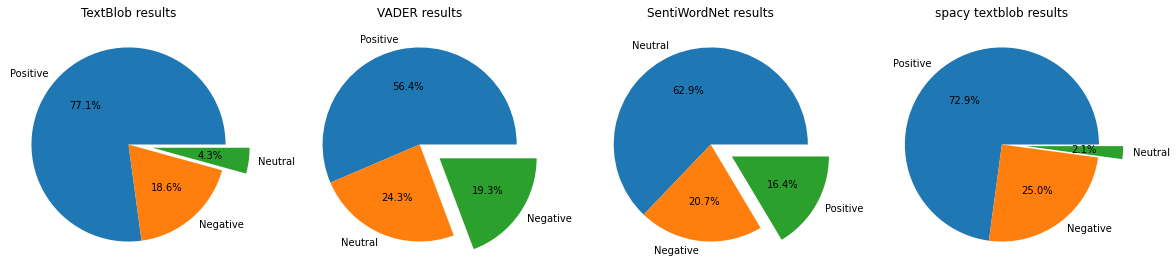

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,4,4)
plt.title("spacy textblob results")
plt.pie(spacy_counts.values, labels = spacy_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

Using NLP - SpaCy to parse text. It is open source software python library for information extractsion and preprocessing text for modelling  
Trying to understand what are top 10 used adjectives in transcripts



In [ ]:
# import spacy
import spacy

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
# create spacy 
adj={}

for ttext in df.transcriptions:
  doc = nlp(ttext)
  for token in doc:
    #print(token.text,'->',token.pos_)
    if (token.pos_ in ('ADJ') and token.text not in ('other','able')):
      #print(token.text,'->',token.pos_)
      if token.text in adj.keys():
        #print(token.text,'->',token.pos_)
        adj[token.text] = adj[token.text] +1
      else:
        adj[token.text]=1   



In [ ]:
# N largest values in dictionary
# Using sorted() + itemgetter() + items()
from operator import itemgetter
N=20
resplt = dict(sorted(adj.items(), key = itemgetter(1), reverse = True)[:N])
res = dict(sorted(adj.items(), key = itemgetter(1), reverse = True))

  


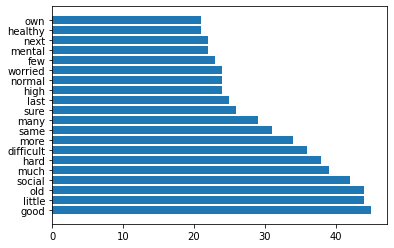

In [ ]:
names = list(resplt.keys())
values = list(resplt.values())

#tick_label does the some work as plt.xticks()
#plt.bar(range(len(res)), values, tick_label = names)
# Create horizontal bars
plt.barh(y=names, width=values)
plt.savefig('bar.png')
plt.show()